# ECE 2200 - Chapter 3 notebook
Copyright (C) 2022 Daniel Van Blerkom

In [2]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


Let's define the functions for the equations for the voltage ripple and peak diode current for the half-wave rectifier:

In [3]:
def Vripple(Vp,RL,C1,Vdon,f): return (Vp - Vdon)/(RL*C1*f)

In [4]:
def Ipeak(Vp,RL,C1,Vdon,f): return (Vp/RL)*(1 + RL*C1*2*3.14159*f*math.sqrt(2*Vripple(Vp,RL,C1,Vdon,f)/Vp))

Now let's compare how the ripple and peak current scales when we use larger smoothing capacitors.

As you can see, the ripple gets smaller but the peak current gets larger.

In [5]:
Cps = np.arange(-2.0,0.0,0.1)
Cps = 10**Cps
ipplot = np.zeros_like(Cps)
vrplot = np.zeros_like(Cps)
for i,cp in enumerate(Cps):
    vrplot[i] = Vripple(4.5,10,cp,0.8,60)
    ipplot[i] = Ipeak(4.5,10,cp,0.8,60)
    

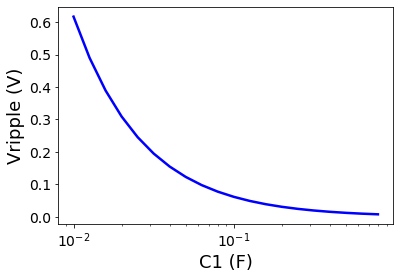

In [6]:
plt.figure()
plt.plot(Cps, vrplot, color='b', linewidth=2.5)
plt.xlabel('C1 (F)', fontsize=18)
plt.ylabel('Vripple (V)', fontsize=18)

ax = plt.gca()

ax.set_xscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


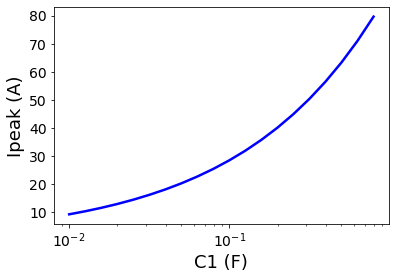

In [7]:
plt.figure()
plt.plot(Cps, ipplot, color='b', linewidth=2.5)
plt.xlabel('C1 (F)', fontsize=18)
plt.ylabel('Ipeak (A)', fontsize=18)

ax = plt.gca()

ax.set_xscale('log')

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)


## Homework Problems

#### Problem 3.36

We just plug the values into our equation for the ripple of a half-wave rectifier:

In [8]:
print("Ripple (V):",Vripple(3.5,100,0.001,0.8,60))

Ripple (V): 0.45


#### Problem 3.37

Here we need to solve for the capacitance in terms of the voltage ripple.  Re-arranging the half-wave ripple equations gives:

In [9]:
def Csmooth(Vp,RL,Vripple,Vdon,f): return (Vp - Vdon)/(RL*Vripple*f)

In [10]:
print("Capacitance required (F):",format(Csmooth(3.0,3.0/0.5,0.3,0.0,60),'.2E'))

Capacitance required (F): 2.78E-02


#### Problem 3.38

The circuit will fail - during the positive cycle, both paths are blocked so no current will flow, but during the negative cycle there will be a short circuit through D3 and D1, likely destroying the diodes.

#### Problem 3.41

For the full-wave rectifier, we use the ripple equation which doubles the frequency and also doubles the number of diode voltage drops.

In [11]:
# full-wave rectifier ripple equation - 2 VDon drop and 2* frequency
def Vfull_ripple(Vp,RL,C1,Vdon,f): return (Vp - 2*Vdon)/(RL*C1*2*f)

print("Ripple (V):",format(Vfull_ripple(3.0,30,0.001,0.8,60),'.2E'))

Ripple (V): 3.89E-01


#### Problem 3.44 

For this problem we will use the equation for the ripple in terms of the load current.

a) The drop across the resistor is the output of the full-wave rectifier (Vp-2Vdon) minus the voltage at the load, which is 3Vdon. The load current is then (Vp - 2Vdon - 3Vdon)/R1.

Note that the answers in the publisher's answer guide don't include the 3Vdon, which is incorrect.

In [12]:
# full-wave rectifier ripple, in terms of load current
def Vfull_ripple_iload(Iload,C1,f): return Iload/(C1*2*f)

iload = ((5.0 - 2*0.8) - 3*0.8)/1000
print("Ripple (V):",format(Vfull_ripple_iload(iload,0.0001,60),'.2E'))

Ripple (V): 8.33E-02


b) This ripple at the capacitor is divided by the resistor divider of R1 and the small signal resistance of the 3 diodes, 3\*rdon.

In [13]:
rdon = 0.026/iload
rdon_all = 3*rdon
load_ripple = Vfull_ripple_iload(iload,0.0001,60)*(rdon_all/(1000+rdon_all))
print("Ripple at load (V):",format(load_ripple,'.2E'))

Ripple at load (V): 6.03E-03


#### Problem 3.45

The current limit is set by the resistor.  We will check both cases (positive and negative limiting), and choose the larger resistor.

The battery voltages must be Vb1 = 2.2-Vdon = 1.4V, and Vb2 = -1.9+Vdon = -1.1V

In [14]:
R_pos_limit = (5 - 2.2)/0.002
R_neg_limit = (5 - 1.9)/0.002
print("Resistor for 2ma limit due to positive threshold (ohms):", format(R_pos_limit,'.2E'))
print("Resistor for 2ma limit due to negative threshold (ohms):", format(R_neg_limit,'.2E'))


Resistor for 2ma limit due to positive threshold (ohms): 1.40E+03
Resistor for 2ma limit due to negative threshold (ohms): 1.55E+03
